# Project 3 - Book 2: Web APIs & Classification

## Problem Statement

Nutrino is a leading provider of nutrition related data services and analytics. As part of the data science team, we have been tasked to generate business insights curated from popular social media platforms. The company will be able to use that information to better understand customers & markets, enhance decision-making, and ultimately increase profitability.

To do so, we will first be scrapping data from reddit and using classification models such as Logistic Regression and Naive Bayes to uncover patterns within 2 popular diets, Keto and Vegan. We will measure our success using several classificationmetrics inclusing accuracy and F1 score. 

We hope to reveal previously unrecognised sub-trends that pertains to attitudes, lifestyles and buying behavior, strong sub trends as opposed to passing sub trends. With a better understanding of the population and their eating patterns, our clients will be able to strengthen their targeted marketing campaigns and improve the success of their products and programs.

## Executive Summary

As the data science team in Nutrino, we have been tasked to build a classifier to improve core product of the company, which is to provide nutrition related data services and analytics. We are also tasked to identify patterns on 2 currently trending diets, keto and vegan. 

Our classifier was successful in predicting at an above 90% accuracy score. We also identified patterns in the motivations and preferences of the 2 groups of subredditors, which will help determine the kind of customer engagement with teach group. 


## Notebooks:
- [Data Scrapping and Cleaning](./book1_data_scrapping_cleaning.ipynb)
- [EDA](./book2_eda.ipynb)
- [Modeling and Recommendations](./book3_preprocesing_modeling_recommendations.ipynb)



## Contents:
- [Import Libraries](#Import-Libraries)
- [Import Data](#Import-Data)
- [More Data Cleaning](#More-Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Forging Ahead](#Forging-Ahead)

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Import Data

In [2]:
#read data and import into notebook 
data_df = pd.read_csv('../datasets/data_clean.csv')

In [3]:
data_df.shape

(1647, 8)

### More Data Preprocessing

#### Prepare data for word cloud

In [4]:
#we make a list of words from the vegan subreddit
vegan_clean = data_df[data_df['vegan_label']==1]

vegan_words = []
for row in vegan_clean['text']:
    vegan_words.extend(str(row).split(" "))

print(f'Number of words in r/vegan: {len(vegan_words)}')

vegan_series=pd.Series(vegan_words).str.cat(sep=' ')

#we do the same ofr keto
keto_clean = data_df[data_df['vegan_label']==0]

keto_words = []
for row in keto_clean['text']:
    keto_words.extend(str(row).split(" "))

print(f'Number of words in r/keto: {len(keto_words)}')

keto_series=pd.Series(keto_words).str.cat(sep=' ')

Number of words in r/vegan: 30543
Number of words in r/keto: 50504


#### Quick Observation: 
Even though the Vegan subreddit has more posts than the Keto subreddit, the total number of words is more than that of Vegan

### Exploratory Data Analysis

#### Word Frequency

In [5]:
from wordcloud import WordCloud

def wc(x):
    wc=WordCloud(width=1200,height=800,
                background_color='white',
                max_words=200)
    wc.generate(x)
    
    #plot
    fig=plt.figure(figsize=(6,4))
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

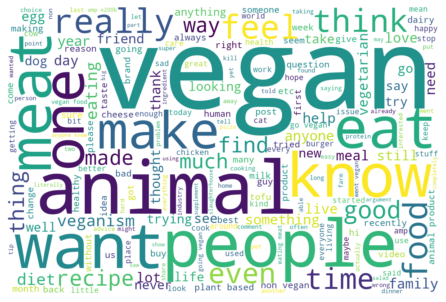

In [6]:
#let's see some of the most popular words in each subreddit
wc(vegan_series)

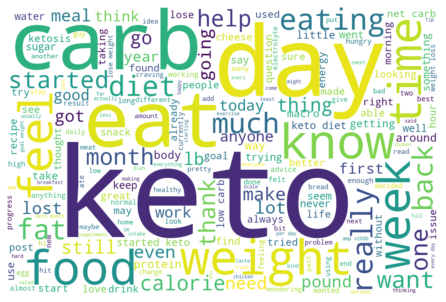

In [7]:
wc(keto_series)

#### Some observations from the word clouds (without links)
- The most frequently appeared words include animal. This is unsurprising since veganism has alot to do with reducing animal cruelty by reducing meat intake. Other words include want and make, which are verbs that show intentionality in making this choice. 

- Other than the obvious word keto, keto subreddits seem to be motivated by weight loss. Because of that, there are frequent mentions of how the subreddits feel and what they eat. Since the objective is to lose weight, there is strong community sharing on how they feel after x number of days into the diet. There is a strong emphasis on avoiding/reducing carbs proportion of the calories for the day. 

#### Unique observations from the word clouds (with links)
- people on the vegan diet seem to be much more focused on the science behind the diet with references to many reputable online research materials on the benefits of plant based diets

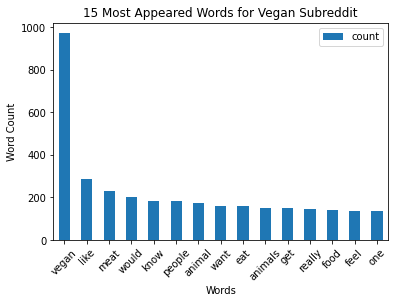

In [8]:
#let's see exactly how frequently the words show up
words=[]
count=[]
for word in vegan_words:
    if word in words:
        count[words.index(word)]+=1
    else:
        words.append(word)
        count.append(1)

count_df = pd.DataFrame(zip(words,count),columns=['word','count']).sort_values('count',ascending=False).head(15)

count_df.plot(kind='bar', x='word')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Word Count')
plt.title('15 Most Appeared Words for Vegan Subreddit');

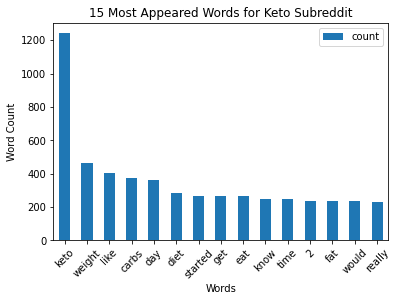

In [9]:
#let's see exactly how frequently ketowords show up
words=[]
count=[]
for word in keto_words:
    if word in words:
        count[words.index(word)]+=1
    else:
        words.append(word)
        count.append(1)

count_df = pd.DataFrame(zip(words,count),columns=['word','count']).sort_values('count',ascending=False).head(15)

count_df.plot(kind='bar', x='word')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Word Count')
plt.title('15 Most Appeared Words for Keto Subreddit');

#### Other observation on most appeared words
Here we can see that there are some numbers that pop up in the most frequently appeared words. Since the main motivation of keto is to lose weight, the high frequency of numbers is unsurprising. 

#### Average word count per post

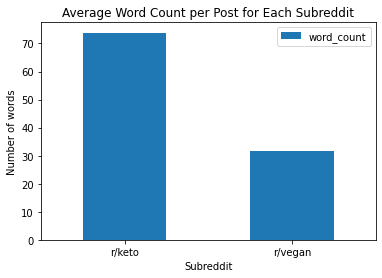

In [10]:
#next, let's see the average word count per post, using the feature we created
wc_avg = pd.DataFrame(data_df.groupby('subred_name')['word_count'].mean())

wc_avg.plot(kind='bar')
plt.xticks(rotation=360)
plt.xlabel('Subreddit')
plt.ylabel('Number of words')
plt.title('Average Word Count per Post for Each Subreddit');

As we can see here the keto subreddits seem to be much more descriptive, which we saw when we were creating our bag of words. We saw the even though there were more vegan posts, the keto words list was much longer in length. 

With keto subredditers, alot of them share their experiences and feeling after trying the diet. The community is big on sharing progress and spurring each other on. Whereas vegan subreddits share their meals with images. 

#### Word Count per post

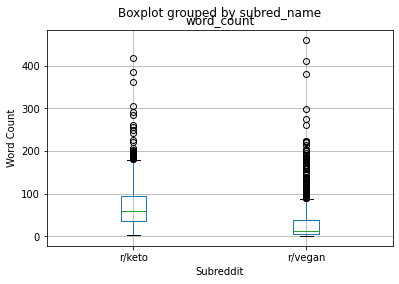

In [16]:
data_df.boxplot(column='word_count',by='subred_name')
plt.xlabel('Subreddit')
plt.ylabel('Word Count');

Similarly, this shows that the word count per post is higher for keto than vegan

#### Upvotes

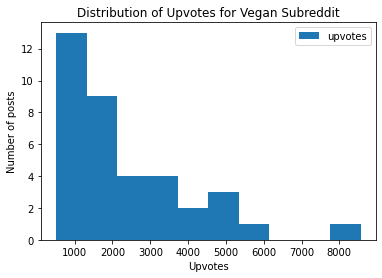

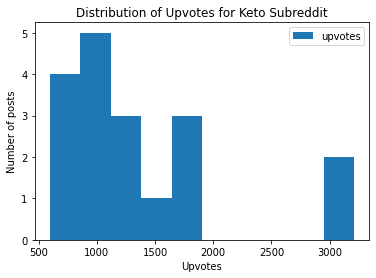

In [12]:
#upvotes are similar to the concept of likes
#let's take a look at most liked posts from each subreddit

upvotes_df = data_df[['subred_name','upvotes']]
vegan_upvotes_df = upvotes_df[(upvotes_df['subred_name']=='r/vegan')&
                              (upvotes_df['upvotes']>=500)].sort_values('upvotes',ascending=False)
keto_upvotes_df = upvotes_df[(upvotes_df['subred_name']=='r/keto')&
                              (upvotes_df['upvotes']>=500)].sort_values('upvotes',ascending=False)

vegan_upvotes_df.plot(kind='hist')
plt.xticks(rotation=360)
plt.xlabel('Upvotes')
plt.ylabel('Number of posts')
plt.title('Distribution of Upvotes for Vegan Subreddit');

keto_upvotes_df.plot(kind='hist')
plt.xticks(rotation=360)
plt.xlabel('Upvotes')
plt.ylabel('Number of posts')
plt.title('Distribution of Upvotes for Keto Subreddit');

#### Observations on Distribution of  Vegan Upvotes

The mode seems to be centered around 1000 and tapers down as the upvotes increases. The mean is also way larger than the median, giving it a large skew to the right. However, there is a particular post that had over 8000 upvotes.
Let's see it below.

In [13]:
data_df[data_df['upvotes']>8000]['text']

45    vegan starbucks worker order new impossible br...
Name: text, dtype: object

This post was from a vegan starbucks worker that warns other vegans that the sandwich from starbucks is no vegan and explains why. The OP continues to give other vegan alternatives in starbucks.

Seems like actionable advice like this is strongly appreciated. 

additional research: https://www.reddit.com/r/vegan/comments/hej15c/vegan_starbucks_worker_here_dont_order_the_new/

#### Observations on Distribution of  Keto Upvotes

The mode is also centered around 1000 but has another peak at around 1700 upvotes. Similar to the vegan subreddit, there are a couple of posts that had over 3000 upvotes.

The popular posts were more often than not posts of keto success stories. 

#### Overall on upvotes:
Vegan subredditers are much more active than keto subredditer when it comes to responding to others in the community

#### Number of Comments

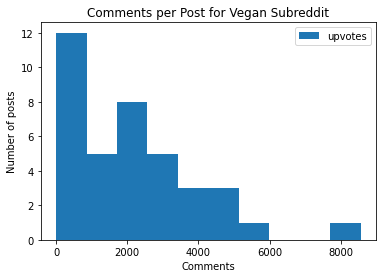

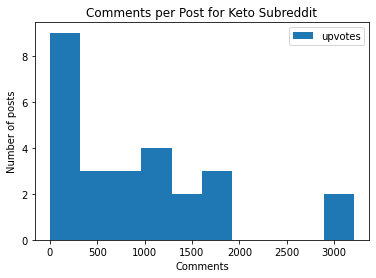

In [14]:
#most commented posts and its distribution
#comments are an indication that people are interested in a topic
#let's take a look at most commented posts from each subreddit

comments_df = data_df[['subred_name','num_comments']]
vegan_comments_df = upvotes_df[(comments_df['subred_name']=='r/vegan')&
                              (comments_df['num_comments']>=50)].sort_values('upvotes',ascending=False)
keto_comments_df = upvotes_df[(comments_df['subred_name']=='r/keto')&
                              (comments_df['num_comments']>=50)].sort_values('upvotes',ascending=False)

vegan_comments_df.plot(kind='hist')
plt.xticks(rotation=360)
plt.xlabel('Comments')
plt.ylabel('Number of posts')
plt.title('Comments per Post for Vegan Subreddit');

keto_comments_df.plot(kind='hist')
plt.xticks(rotation=360)
plt.xlabel('Comments')
plt.ylabel('Number of posts')
plt.title('Comments per Post for Keto Subreddit');

#### Observations on distribution of the number of comments

The distribution seems similar to that of upvotes and the outliers observed are the same as the ones identified earlier in upvotes. 

Since they do not give additional weight to the words and impact the model, we will leave the posts in. 

Overall, this further supports our belief that vegan seems to be a more active and popular trend

#### Summary Statistics

In [15]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
vegan_label,1647.0,0.584699,0.492923,0.0,0.0,1.0,1.0,1.0
upvotes,1647.0,90.519126,458.520744,0.0,1.0,5.0,22.0,8560.0
num_comments,1647.0,13.675774,32.056819,0.0,3.0,7.0,14.0,587.0
word_count,1647.0,49.208865,53.760947,1.0,10.0,34.0,67.0,461.0


#### Observation of Summary statistics

After our EDA, we now know that the high std of upvotes is caused by a couple of wildly popular posts. Although, this is not particularly useful to us. 

### Forging Ahead
Having explored the data, we had some interesting observations. Coupled with our domain knowledge about the 2 diets, we can deduce a general profile of our target market: 

Motivations: 
- Vegan -> prevent animal cruelty
- Keto -> weight loss

Preference: 
- Vegan -> useful actionable advice 
- Keto -> success stories

Talking points:
- Vegan -> science behind veganism
- Keto -> Progress updates


With these in mind, we will likely be able to provide Nutrino with good insights for their client's targeted marketing

- [Modeling and Recommendations](./book3_modeling_recommendations.ipynb)